<font size="5">Linear Regression using Normal Equation / Closed Form</font><br>

It is a method to solve for parameters $(\theta)$ analytically

We have to solve the equation :- <br>
$\theta = (X^TX)^{-1}  X^Ty$ <br>

where : <br>
$X$  is a $m$ x $(n+1)$ matrix containing all the feature values of training set.<br>
$X^T$  is transpose of $X$ matrix.<br>
$y$ is a vector i.e ($m$ x $1$) matrix containing values of target variable<br>

Here, $m$ is no of training examples and $n$ is number of features.

In [1]:
#import required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [2]:
#get data in place
points = np.genfromtxt("../../data/data.csv",delimiter=",")
X = points[:,0]
Y = points[:,1]

X_test = X[0:10]
Y_test = Y[0:10]

X_train = X[10:100]
Y_train = Y[10:100]

X_train


array([45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
       48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754,
       66.18981661, 65.41605175, 47.48120861, 41.57564262, 51.84518691,
       59.37082201, 57.31000344, 63.61556125, 46.73761941, 50.55676015,
       52.22399609, 35.56783005, 42.43647694, 58.16454011, 57.50444762,
       45.44053073, 61.89622268, 33.09383174, 36.43600951, 37.67565486,
       44.55560838, 43.31828263, 50.07314563, 43.87061265, 62.99748075,
       32.66904376, 40.16689901, 53.57507753, 33.86421497, 64.70713867,
       38.11982403, 44.50253806, 40.59953838, 41.72067636, 51.08863468,
       55.0780959 , 41.37772653, 62.49469743, 49.20388754, 41.10268519,
       41.18201611, 50.18638949, 52.37844622, 50.13548549, 33.64470601,
       39.55790122, 56.13038882, 57.36205213, 60.26921439, 35.67809389,
       31.588117  , 53.66093226, 46.68222865, 43.10782022, 70.34607562,
       44.49285588, 57.5045333 , 36.93007661, 55.80573336, 38.95

<font size="4">Prepare matrix X</font><br>
For preparing matix X, we must convert vector X to a matrix of 2 columns.<br>
Column 1 i.e $X_{0}$ must be a column of ones.

In [3]:
#converting vectors to a column matrix
X0 = np.ones((X_train.shape[0],1))
X1 = np.reshape(X_train,(X_train.shape[0],1))

#use hstack to combine both matrices
X_mat = np.hstack((X0,X1))
X_mat

array([[ 1.        , 45.41973014],
       [ 1.        , 54.35163488],
       [ 1.        , 44.1640495 ],
       [ 1.        , 58.16847072],
       [ 1.        , 56.72720806],
       [ 1.        , 48.95588857],
       [ 1.        , 44.68719623],
       [ 1.        , 60.29732685],
       [ 1.        , 45.61864377],
       [ 1.        , 38.81681754],
       [ 1.        , 66.18981661],
       [ 1.        , 65.41605175],
       [ 1.        , 47.48120861],
       [ 1.        , 41.57564262],
       [ 1.        , 51.84518691],
       [ 1.        , 59.37082201],
       [ 1.        , 57.31000344],
       [ 1.        , 63.61556125],
       [ 1.        , 46.73761941],
       [ 1.        , 50.55676015],
       [ 1.        , 52.22399609],
       [ 1.        , 35.56783005],
       [ 1.        , 42.43647694],
       [ 1.        , 58.16454011],
       [ 1.        , 57.50444762],
       [ 1.        , 45.44053073],
       [ 1.        , 61.89622268],
       [ 1.        , 33.09383174],
       [ 1.        ,

In [4]:
#get matrix y
Y_mat = np.reshape(Y_train,(Y_train.shape[0],1))
Y_mat

array([[ 55.16567715],
       [ 82.47884676],
       [ 62.00892325],
       [ 75.39287043],
       [ 81.43619216],
       [ 60.72360244],
       [ 82.89250373],
       [ 97.37989686],
       [ 48.84715332],
       [ 56.87721319],
       [ 83.87856466],
       [118.5912173 ],
       [ 57.25181946],
       [ 51.39174408],
       [ 75.38065167],
       [ 74.76556403],
       [ 95.45505292],
       [ 95.22936602],
       [ 79.05240617],
       [ 83.43207142],
       [ 63.35879032],
       [ 41.4128853 ],
       [ 76.61734128],
       [ 96.76956643],
       [ 74.08413012],
       [ 66.58814441],
       [ 77.76848242],
       [ 50.71958891],
       [ 62.12457082],
       [ 60.81024665],
       [ 52.68298337],
       [ 58.56982472],
       [ 82.90598149],
       [ 61.4247098 ],
       [115.2441528 ],
       [ 45.57058882],
       [ 54.0840548 ],
       [ 87.99445276],
       [ 52.72549438],
       [ 93.57611869],
       [ 80.16627545],
       [ 65.10171157],
       [ 65.56230126],
       [ 65

In [5]:
#get theta matrix using training examples

X_t = X_mat.transpose()
prt1  = np.linalg.inv(np.dot(X_t , X_mat))
prt2 = np.dot(prt1,X_t)

theta = np.dot(prt2,Y_mat)

theta


array([[8.09020494],
       [1.33368278]])

<font size="4">Time to get answers from our model !</font><br>
We observe that :
$h_{\theta}(x) = \theta_{0} * (x_{0}) + \theta_{1} * (x_{1}) $  <br>
here $x_{0} = 1$ <br>
Remember we had added an extra column of ones to our X_train matrix earlier... that was done to satisfy this condition now...<br>
We can see that $h_{\theta}(x)$ is product of $\theta$ matrix and $X$ matrix <br>
Hence product of $X$ matrix and $\theta$ matrix will give a matrix with 1 column containing values o f $Y$ for the given $X$ values in $X$ matrix used.

In [6]:
#get value of y for test data 
X0_test = np.ones((X_test.shape[0],1))
X1_test = np.reshape(X_test,(X_test.shape[0],1))

#use hstack to combine both matrices
X_test_mat = np.hstack((X0_test,X1_test))

#get answers for test data from the model
Y_regression = np.dot(X_test_mat,theta)

Y_test = np.reshape(Y_test,(Y_test.shape[0],1))

#for testing accuracy of the model
mean_squared_error = 0; 
for i in range (0,Y_test.shape[0]):
    diff = Y_test[i] - Y_regression[i]
    mean_squared_error += diff*diff
    
mean_squared_error = mean_squared_error/Y_test.shape[0]

print("mean squared error = {0}".format(mean_squared_error))
    

mean squared error = [133.65130154]


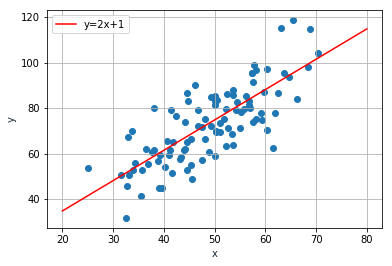

In [7]:
#plot solution
y_intercept = theta[0]
slope = theta[1]

plt.figure()
plt.scatter(X,Y)

x = np.linspace(20,80,10)
y = slope*x+y_intercept
plt.plot(x, y, '-r', label='y=2x+1')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()

plt.show()
